In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test

X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train.shape

(42000, 784)

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [8]:
X_test = X_test.values.reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10 )
y_train.shape

(42000, 10)

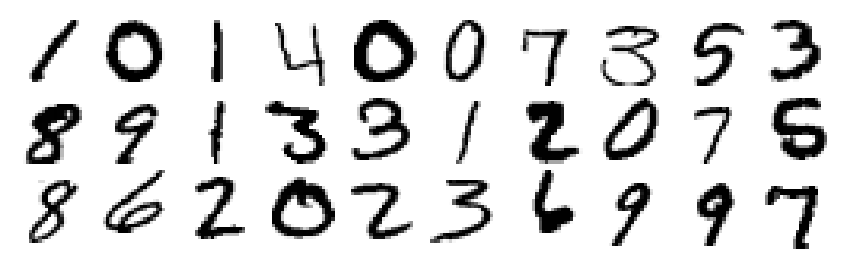

In [10]:
# Let's preview the images
plt.figure(figsize = (15,4.5))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [11]:
X_train[0].shape

(28, 28, 1)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Create more images with Data Generator
datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range = 0.1,
            width_shift_range=0.1,
            height_shift_range=0.1)

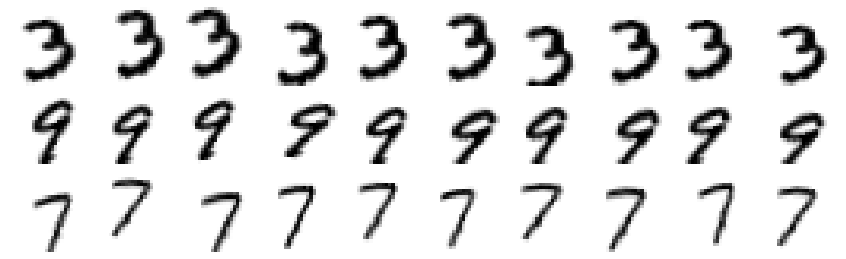

In [14]:
# Preview Augmented Images
X_train3 = X_train[9,].reshape((1,28,28,1))
y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3,10,i+1)
    X_train2, y_train2 = datagen.flow(X_train3, y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)), cmap = plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-.1, hspace=-.1)
plt.show()

In [15]:
from tensorflow.keras import datasets, layers, models

In [16]:
# Build 15 Convolutional Neural Networks

nets = 15
model = [0]*nets
for j in range(nets):
    model[j] = models.Sequential()
    
    model[j].add( layers.Conv2D( 32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Conv2D( 32, kernel_size = 3, activation = 'relu') )
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Conv2D( 32, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Dropout(0.4))
    
    model[j].add( layers.Conv2D( 64, kernel_size = 3, activation = 'relu'))
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Conv2D( 64, kernel_size = 3, activation = 'relu'))
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Conv2D( 64, kernel_size = 5, strides = 2, padding='same', activation = 'relu'))
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Dropout(0.4))
    
    model[j].add( layers.Conv2D( 128, kernel_size = 4, activation = 'relu'))
    model[j].add( layers.BatchNormalization())
    model[j].add( layers.Flatten())
    model[j].add( layers.Dropout(0.4))
    model[j].add( layers.Dense(10, activation = 'softmax'))
    
    # Compile with Adam optimizer and Cross Entropy Cost
    model[j].compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

In [18]:
# Decrease the learning rate for each epoch
annealer = LearningRateScheduler( lambda x: 1e-3 * 0.95 ** x )

# Train the networks
history = [0]*nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, y_train2, y_val2 = train_test_split( X_train, y_train, test_size = 0.1)
    history[j] = model[j].fit_generator( datagen.flow( X_train2, y_train2, batch_size = 64),
                                       epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,
                                       validation_data = (X_val2, y_val2), callbacks = [annealer], verbose=0)
    print( "CNN {0:d}: Epochs={1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}".format(
                        j+1, epochs, max(history[j].history['accuracy']), max(history[j].history['val_accuracy'])
                                                                                                    )
         )

CNN 1: Epochs=45, Train accuracy = 0.99481, Validation accuracy = 0.99595
CNN 2: Epochs=45, Train accuracy = 0.99504, Validation accuracy = 0.99571
CNN 3: Epochs=45, Train accuracy = 0.99555, Validation accuracy = 0.99810
CNN 4: Epochs=45, Train accuracy = 0.99544, Validation accuracy = 0.99524
CNN 5: Epochs=45, Train accuracy = 0.99489, Validation accuracy = 0.99595
CNN 6: Epochs=45, Train accuracy = 0.99484, Validation accuracy = 0.99548
CNN 7: Epochs=45, Train accuracy = 0.99504, Validation accuracy = 0.99476
CNN 8: Epochs=45, Train accuracy = 0.99515, Validation accuracy = 0.99476


KeyboardInterrupt: 

In [ ]:
# Ensemble the predictions.
results = np.zeros( (X_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(X_test*1.0)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("MNIST-CNN-ENSEMBLE.csv",index=False)